In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
climate_data = pd.read_csv("/content/GlobalLandTemperaturesByMajorCity.csv")
climate_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
delhi_climate = climate_data[climate_data.City == 'Delhi']
delhi_climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
63153,1796-01-01,14.590,2.374,Delhi,India,28.13N,77.27E
63154,1796-02-01,17.109,1.940,Delhi,India,28.13N,77.27E
63155,1796-03-01,21.454,2.608,Delhi,India,28.13N,77.27E
63156,1796-04-01,28.715,2.122,Delhi,India,28.13N,77.27E
63157,1796-05-01,33.726,1.997,Delhi,India,28.13N,77.27E


In [4]:
processed_data = delhi_climate.copy()

In [5]:
processed_data['ObservationDate'] = pd.to_datetime(processed_data['dt'])

In [6]:
processed_data.set_index(processed_data['ObservationDate'], inplace = True)
processed_data.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='ObservationDate', length=2613, freq=None)

In [7]:
processed_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,ObservationDate
ObservationDate,,,,,,,,
1796-01-01,1796-01-01,14.590,2.374,Delhi,India,28.13N,77.27E,1796-01-01
1796-02-01,1796-02-01,17.109,1.940,Delhi,India,28.13N,77.27E,1796-02-01
1796-03-01,1796-03-01,21.454,2.608,Delhi,India,28.13N,77.27E,1796-03-01
1796-04-01,1796-04-01,28.715,2.122,Delhi,India,28.13N,77.27E,1796-04-01
1796-05-01,1796-05-01,33.726,1.997,Delhi,India,28.13N,77.27E,1796-05-01


In [8]:
drop_columns = ['ObservationDate', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude', 'dt']
processed_data.drop(drop_columns, axis = 1, inplace = True)
processed_data

,AverageTemperature
ObservationDate,
1796-01-01,14.590
1796-02-01,17.109
1796-03-01,21.454
1796-04-01,28.715
1796-05-01,33.726
...,...
2013-05-01,34.746
2013-06-01,33.066
2013-07-01,31.053


In [9]:
processed_data.shape

(2613, 1)

In [10]:
processed_data.isnull().sum()

,0
AverageTemperature,219


In [11]:
total_missing = processed_data.isnull().sum().sort_values(ascending = False)
percent_missing = (processed_data.isnull().sum()*100/processed_data.isnull().count()).sort_values(ascending = False)
missing_values_report = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_values_report

,Total,Percentage of Missing Values
AverageTemperature,219,8.381171


In [12]:
processed_data['AverageTemperature'] = processed_data['AverageTemperature'].interpolate(method='time')
monthly_avg = processed_data.groupby(processed_data.index.month)['AverageTemperature'].transform('mean')
processed_data['AverageTemperature'].fillna(monthly_avg, inplace=True)

<ipython-input-12-59c1f1987fd1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['AverageTemperature'].fillna(monthly_avg, inplace=True)


In [13]:
processed_data.isnull().sum()

,0
AverageTemperature,0


In [14]:
processed_data.shape

(2613, 1)

In [15]:
n = len(processed_data)

# Split 70:20:10 (train:validation:test)
train_df = processed_data[0:int(n*0.7)]
val_df = processed_data[int(n*0.7):int(n*0.9)]
test_df = processed_data[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

((1829, 1), (522, 1), (262, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

<ipython-input-16-3bbf4529207d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
<ipython-input-16-3bbf4529207d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
<ipython-input-16-3bbf4529207d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [17]:
test_df

,AverageTemperature
ObservationDate,
1991-12-01,0.206156
1992-01-01,0.169489
1992-02-01,0.217891
1992-03-01,0.482316
1992-04-01,0.706054
...,...
2013-05-01,0.948877
2013-06-01,0.880659
2013-07-01,0.798920


# Deep Learning Models

In [18]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

import warnings
warnings.filterwarnings('ignore')

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

In [20]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='AverageTemperature', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

## Baseline Models

### Single-step baseline model



In [21]:
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['AverageTemperature'])
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['AverageTemperature'])

class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs

        elif isinstance(self.label_index, list):
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)

        result = inputs[:, :, self.label_index]
        return result[:,:,tf.newaxis]

In [22]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}

baseline_last = Baseline(label_index=column_indices['AverageTemperature'])

baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [23]:
val_performance = {}
performance = {}

val_performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.val)
performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.test, verbose=0)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0253 - mean_absolute_error: 0.1343  


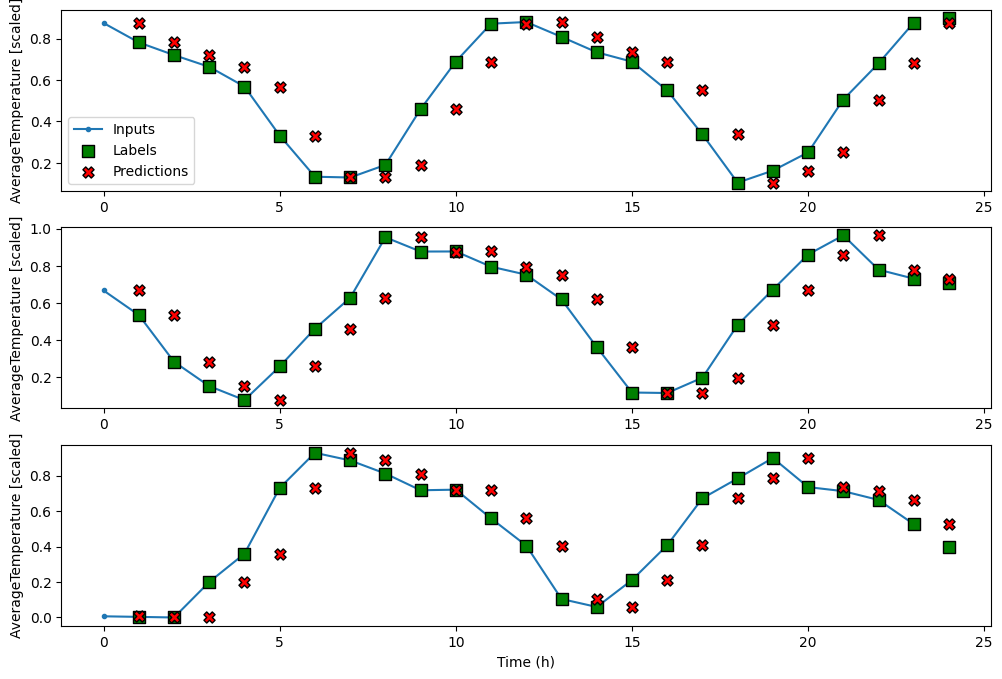

In [24]:
wide_window.plot(baseline_last)

In [25]:
print(performance['Baseline - Last'][1])

0.1361803114414215


### Multi-step baseline models

#### Repeat only Last Value

In [26]:
multi_window = DataWindow(input_width=12, label_width=12, shift=12, label_columns=['AverageTemperature'])

In [29]:
class MultiStepLastBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return tf.tile(inputs[:, -1:, :], [1, 12, 1])
        return tf.tile(inputs[:, -1:, self.label_index:], [1, 12, 1])

In [30]:
ms_baseline_last = MultiStepLastBaseline(label_index=column_indices['AverageTemperature'])

ms_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ms_val_performance = {}
ms_performance = {}

ms_val_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.val)
ms_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.test, verbose=0)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1480 - mean_absolute_error: 0.3089  


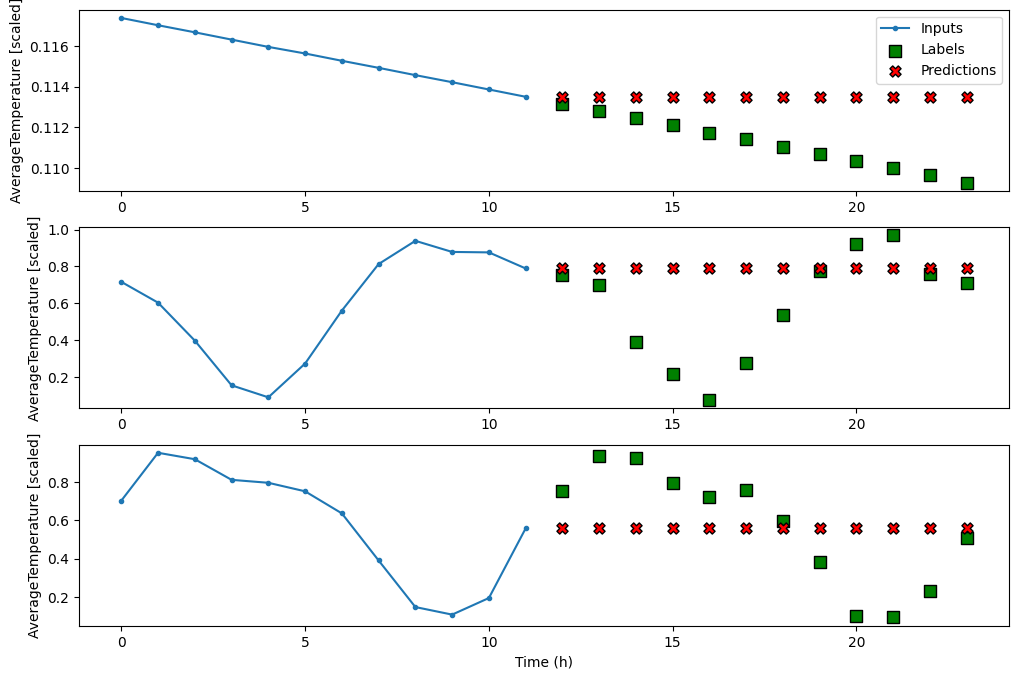

In [31]:
multi_window.plot(ms_baseline_last)

In [32]:
print(ms_performance['Baseline - Last'][1])

0.30641505122184753


#### Repeat Last 24 values

In [33]:
class RepeatBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        return inputs[:, :, self.label_index:]

In [34]:
ms_baseline_repeat = RepeatBaseline(label_index=column_indices['AverageTemperature'])

ms_baseline_repeat.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ms_val_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.val)
ms_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.test, verbose=0)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - mean_absolute_error: 0.0447  


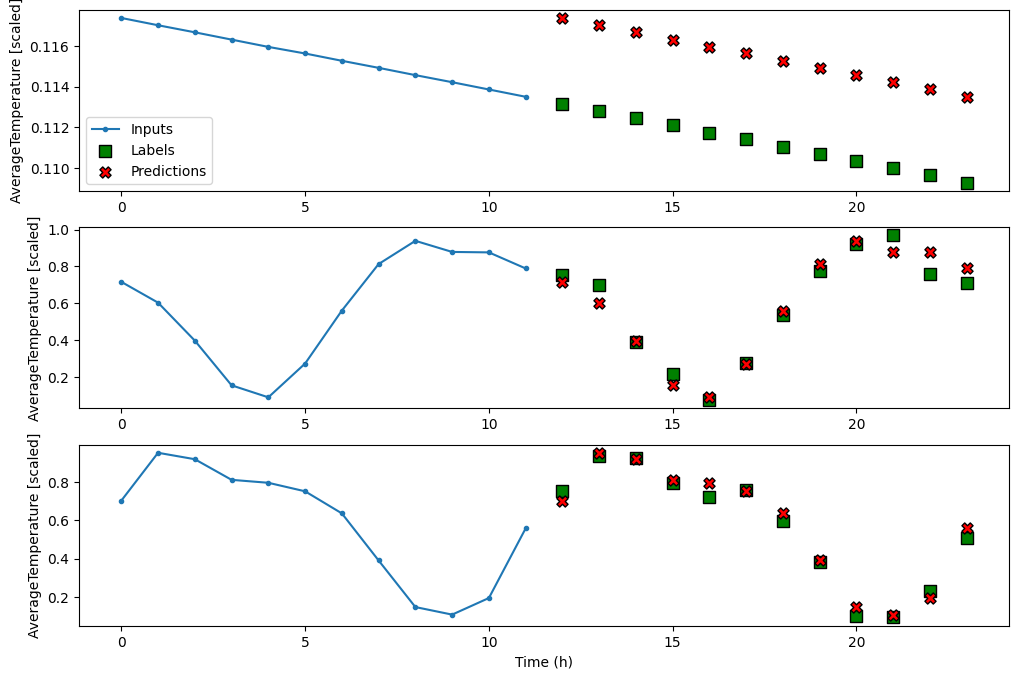

In [35]:
multi_window.plot(ms_baseline_repeat)

In [36]:
print(ms_performance['Baseline - Repeat'][1])

0.04493275657296181


## Linear Model

### Single-Step Linear Model

In [37]:
def compile_and_fit(model, window, patience=3, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')

    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])

    history = model.fit(window.train,
                       epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[early_stopping])

    return history

In [38]:
linear = Sequential([
    Dense(units=1)
])

history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0616 - mean_absolute_error: 0.2007 - val_loss: 0.0490 - val_mean_absolute_error: 0.1885
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0361 - mean_absolute_error: 0.1546 - val_loss: 0.0329 - val_mean_absolute_error: 0.1539
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0257 - mean_absolute_error: 0.1341 - val_loss: 0.0269 - val_mean_absolute_error: 0.1371
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0235 - mean_absolute_error: 0.1275 - val_loss: 0.0249 - val_mean_absolute_error: 0.1314
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0224 - mean_absolute_error: 0.1230 - val_loss: 0.0244 - val_mean_absolute_error: 0.1298
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0219 - mean_absolute_error: 0.1216 - val_loss: 0.0242 - val_mean_absolute_error: 0.1292
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.1227 - val_loss: 0.024

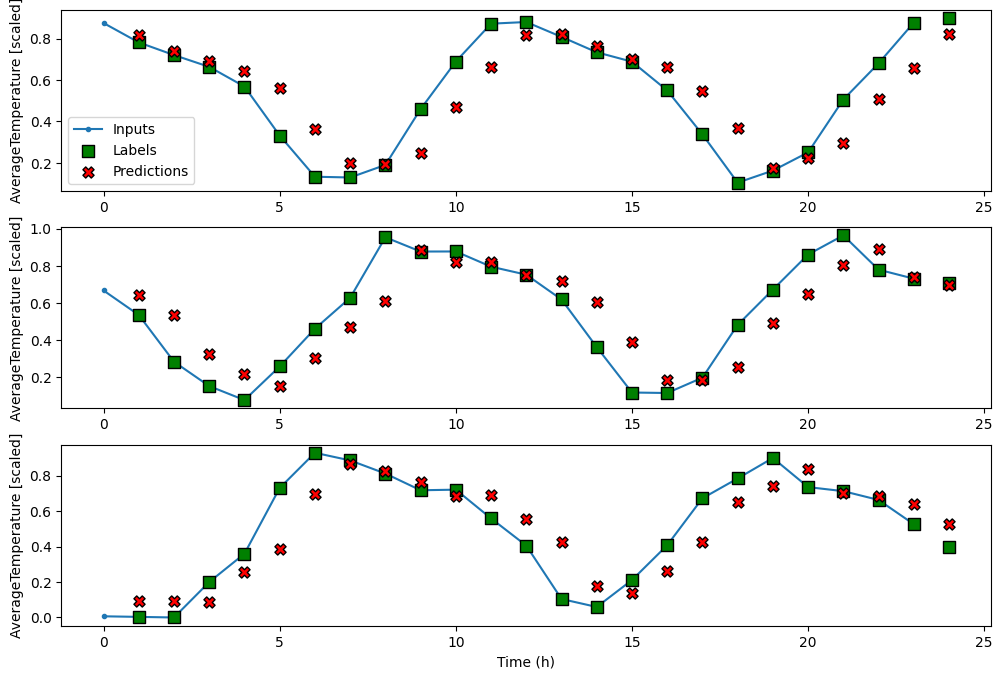

In [39]:
wide_window.plot(linear)

### Mutli-Step Linear Model

In [ ]:
ms_linear = Sequential([
    Dense(1, kernel_initializer=tf.initializers.zeros)
])

history = compile_and_fit(ms_linear, multi_window)

ms_val_performance['Linear'] = ms_linear.evaluate(multi_window.val)
ms_performance['Linear'] = ms_linear.evaluate(multi_window.test, verbose=0)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3159 - mean_absolute_error: 0.4818 - val_loss: 0.2994 - val_mean_absolute_error: 0.4834
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2355 - mean_absolute_error: 0.4021 - val_loss: 0.2215 - val_mean_absolute_error: 0.4056
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1735 - mean_absolute_error: 0.3356 - val_loss: 0.1628 - val_mean_absolute_error: 0.3417
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1279 - mean_absolute_error: 0.2911 - val_loss: 0.1197 - val_mean_absolute_error: 0.2934
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0958 - mean_absolute_error: 0.2579 - val_loss: 0.0892 - val_mean_absolute_error: 0.2553
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0741 - mean_absolute_error: 0.2331 - val_loss: 0.0679 - val_mean_absolute_error: 0.2249
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0589 - mean_absolute_error: 0.2126 - val_loss: 0.053

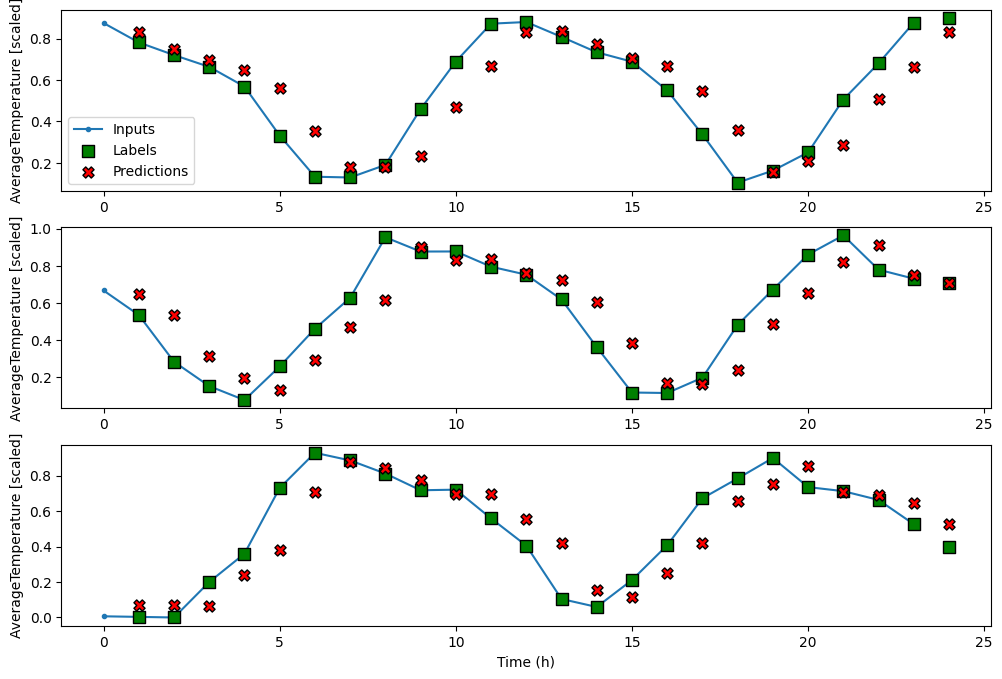

In [41]:
wide_window.plot(ms_linear)

## Implementing Deep Neural Networks

### Single-Step Model with 2 Hidden Layers

In [42]:
dense = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1278 - mean_absolute_error: 0.2837 - val_loss: 0.0250 - val_mean_absolute_error: 0.1298
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.1275 - val_loss: 0.0237 - val_mean_absolute_error: 0.1274
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.1196 - val_loss: 0.0239 - val_mean_absolute_error: 0.1280
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.1171 - val_loss: 0.0241 - val_mean_absolute_error: 0.1280
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0209 - mean_absolute_error: 0.1157 - val_loss: 0.0239 - val_mean_absolute_error: 0.1279
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228 - mean_absolute_error: 0.1246 


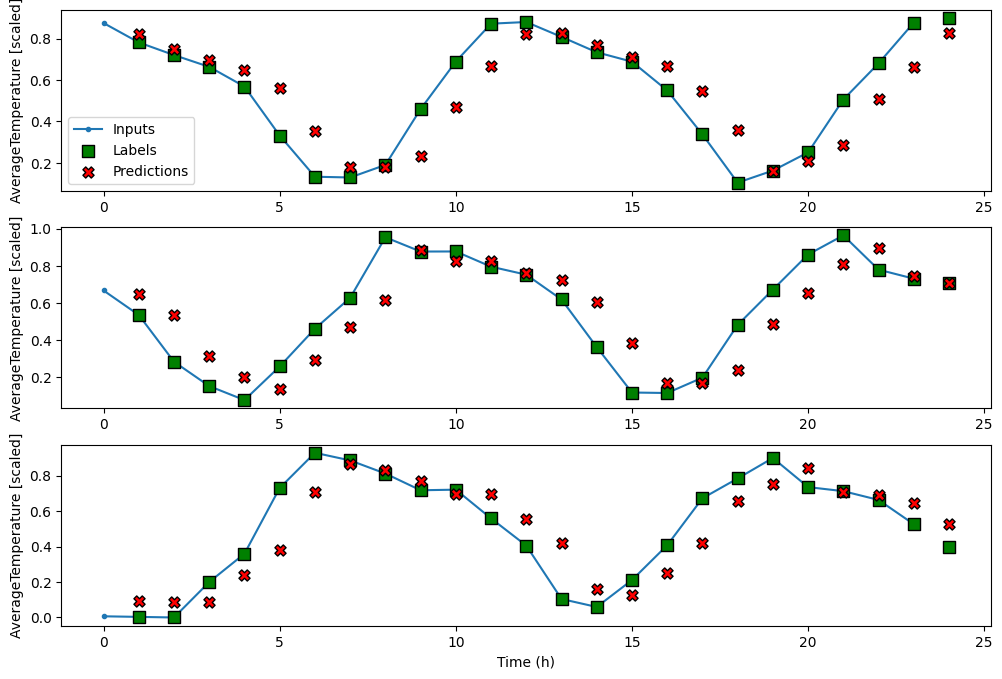

In [43]:
wide_window.plot(dense)

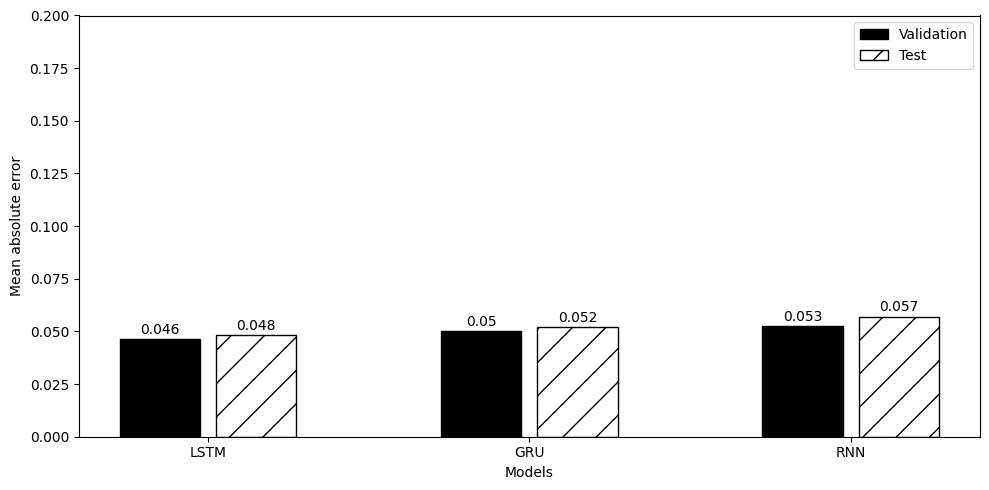

In [81]:
mae_val = [v[1] for v in val_performance.values()]
mae_test = [v[1] for v in performance.values()]

x = np.arange(len(performance))

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.2)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()


### Multi-Step Model with 2 Hidden Layers

In [45]:
ms_dense = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_and_fit(ms_dense, multi_window)

ms_val_performance['Dense'] = ms_dense.evaluate(multi_window.val)
ms_performance['Dense'] = ms_dense.evaluate(multi_window.test, verbose=0)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2407 - mean_absolute_error: 0.4005 - val_loss: 0.0120 - val_mean_absolute_error: 0.0850
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0162 - mean_absolute_error: 0.0995 - val_loss: 0.0064 - val_mean_absolute_error: 0.0655
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0705 - val_loss: 0.0039 - val_mean_absolute_error: 0.0485
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0536 - val_loss: 0.0035 - val_mean_absolute_error: 0.0448
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0501 - val_loss: 0.0033 - val_mean_absolute_error: 0.0438
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0495 - val_loss: 0.0033 - val_mean_absolute_error: 0.0438
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0503 - val_loss: 0.0

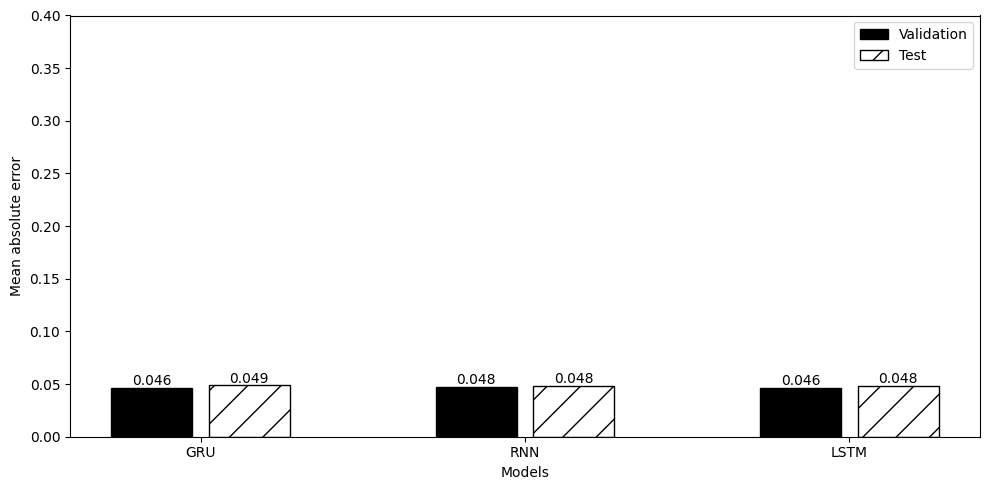

In [80]:
ms_mae_val = [v[1] for v in ms_val_performance.values()]
ms_mae_test = [v[1] for v in ms_performance.values()]

x = np.arange(len(ms_performance))

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=ms_performance.keys())
plt.legend(loc='best')
plt.tight_layout()

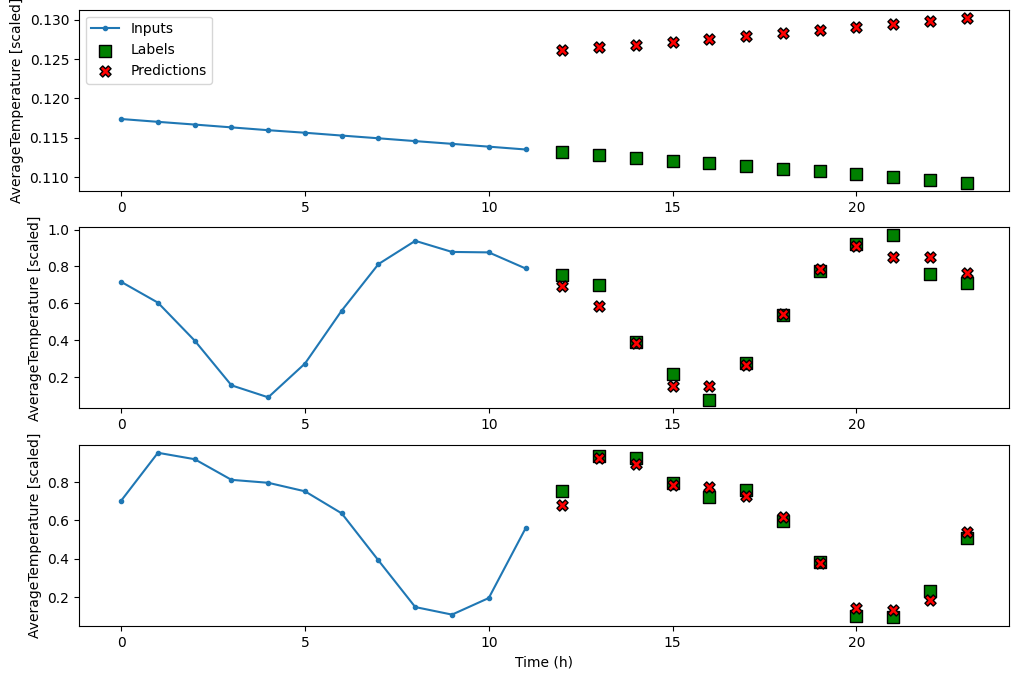

In [47]:
multi_window.plot(ms_dense)

### Single-Step LSTM Model

In [48]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell, SimpleRNN, GRU

import warnings
warnings.filterwarnings('ignore')

In [49]:
# single step
lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)

val_performance = {}
performance = {}

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1481 - mean_absolute_error: 0.3103 - val_loss: 0.0945 - val_mean_absolute_error: 0.2610
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0819 - mean_absolute_error: 0.2429 - val_loss: 0.0693 - val_mean_absolute_error: 0.2250
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0596 - mean_absolute_error: 0.2101 - val_loss: 0.0350 - val_mean_absolute_error: 0.1543
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0291 - mean_absolute_error: 0.1405 - val_loss: 0.0207 - val_mean_absolute_error: 0.1123
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.1131 - val_loss: 0.0180 - val_mean_absolute_error: 0.1036
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.1004 - val_loss: 0.0156 - val_mean_absolute_error: 0.0956
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0921 - val_loss

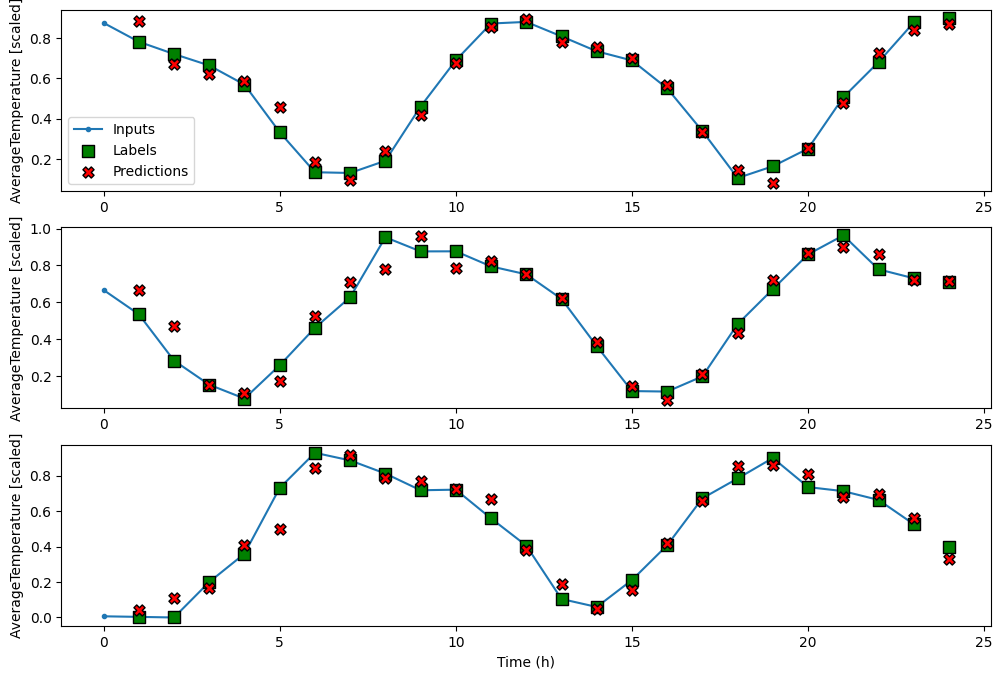

In [50]:
wide_window.plot(lstm_model)

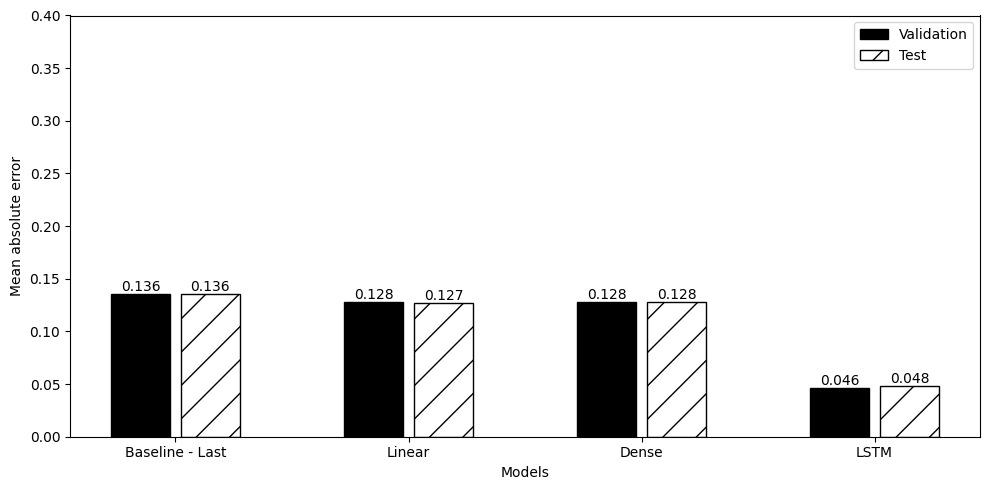

In [79]:
mae_val = [0.136, 0.128, 0.128]
mae_test = [0.136, 0.127, 0.128]

mae_val.append(val_performance['LSTM'][1])
mae_test.append(performance['LSTM'][1])

x = np.arange(4)

labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM']

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

### Single-Step GRU Model

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1574 - mean_absolute_error: 0.3191 - val_loss: 0.0643 - val_mean_absolute_error: 0.2177
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0551 - mean_absolute_error: 0.2026 - val_loss: 0.0402 - val_mean_absolute_error: 0.1694
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0349 - mean_absolute_error: 0.1588 - val_loss: 0.0227 - val_mean_absolute_error: 0.1275
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0224 - mean_absolute_error: 0.1263 - val_loss: 0.0168 - val_mean_absolute_error: 0.1087
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.1088 - val_loss: 0.0140 - val_mean_absolute_error: 0.0974
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0944 - val_loss: 0.0114 - val_mean_absolute_error: 0.0867
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0840 - val_loss

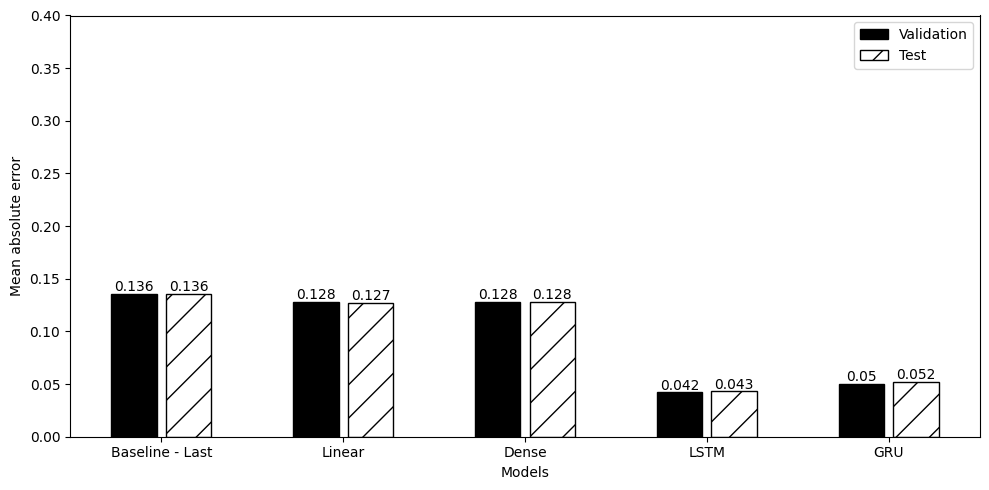

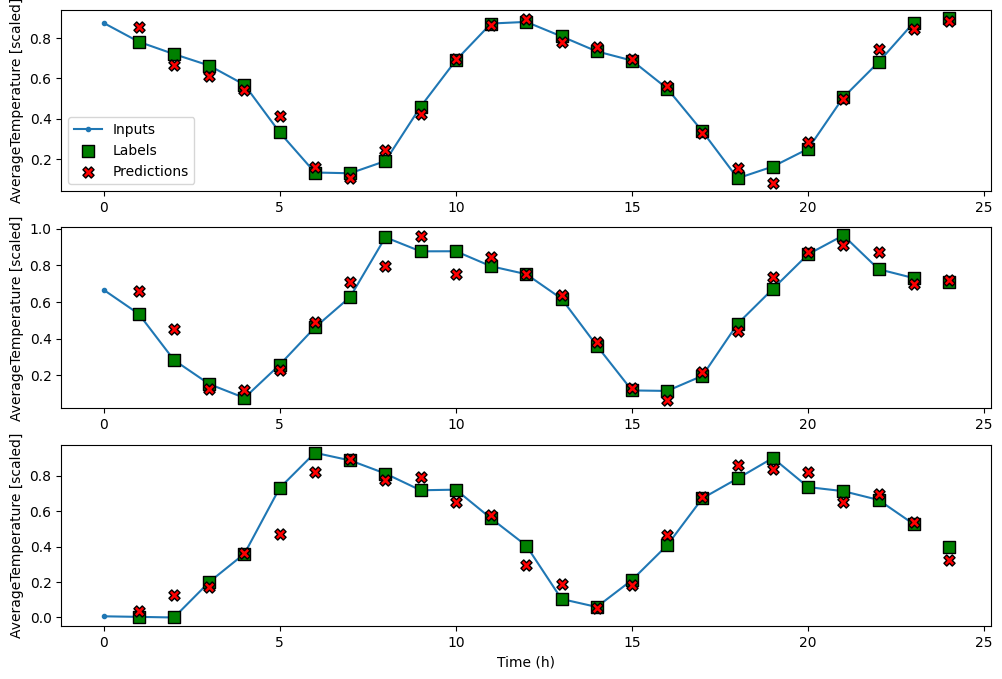

In [ ]:
# single step gru
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# 1. Define the GRU model
gru_model = Sequential([
    GRU(32, return_sequences=True),
    Dense(units=1)
])

# 2. Compile and Fit (reuse same helper function)
history = compile_and_fit(gru_model, wide_window)
    
# 3. Evaluate GRU on validation and test
val_performance['GRU'] = gru_model.evaluate(wide_window.val)
performance['GRU'] = gru_model.evaluate(wide_window.test, verbose=0)

# 4. Existing MAE data
mae_val = [0.136, 0.128, 0.128, 0.042]
mae_test = [0.136, 0.127, 0.128, 0.043]

# 5. Append GRU results
mae_val.append(val_performance['GRU'][1])
mae_test.append(performance['GRU'][1])

# 6. Plot all models including GRU
x = np.arange(5)
labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM', 'GRU']

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

# Annotate MAE values
for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


wide_window.plot(gru_model)

### Single-Step RNN Model

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0426 - mean_absolute_error: 0.1575 - val_loss: 0.0148 - val_mean_absolute_error: 0.0966
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0858 - val_loss: 0.0101 - val_mean_absolute_error: 0.0794
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0731 - val_loss: 0.0086 - val_mean_absolute_error: 0.0734
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0078 - mean_absolute_error: 0.0672 - val_loss: 0.0079 - val_mean_absolute_error: 0.0700
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0070 - mean_absolute_error: 0.0630 - val_loss: 0.0075 - val_mean_absolute_error: 0.0676
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0066 - mean_absolute_error: 0.0602 - val_loss: 0.0070 - val_mean_absolute_error: 0.0650
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0584 - val_loss: 

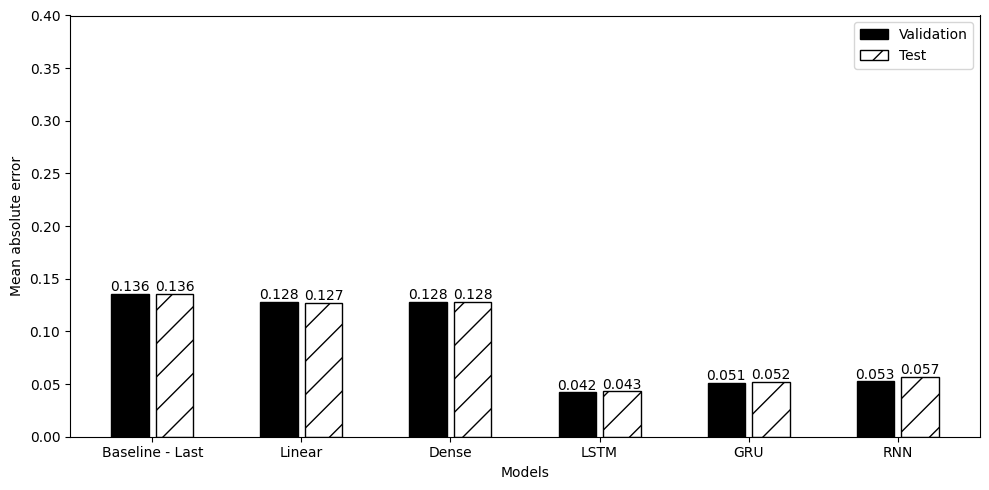

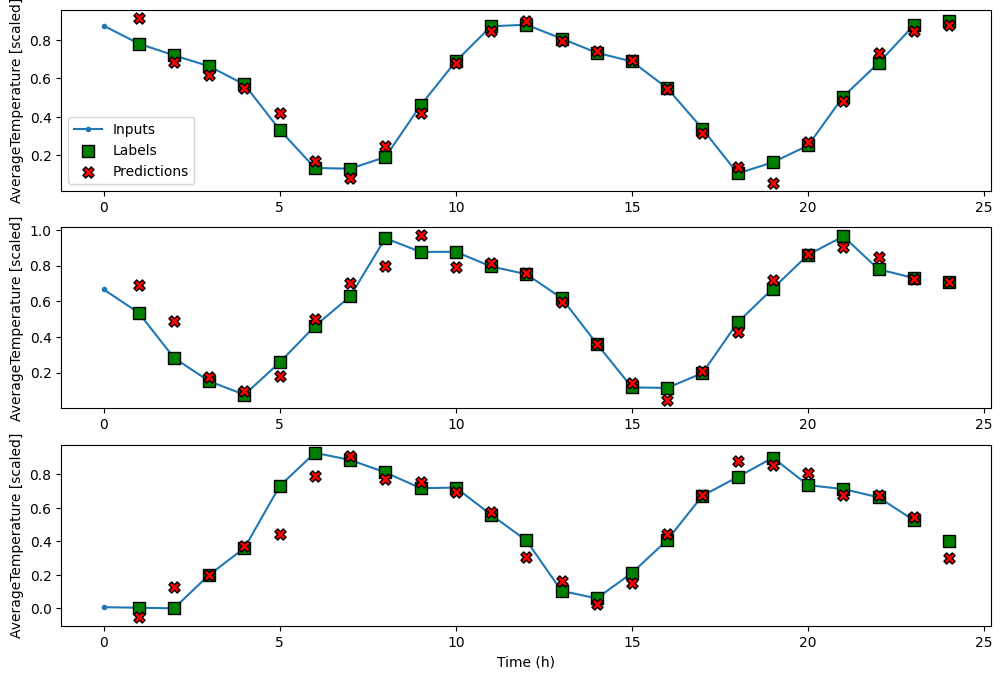

In [75]:
# single step rnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. Define the RNN model
rnn_model = Sequential([
    SimpleRNN(32, return_sequences=True),  # Use return_sequences=True to match wide_window shape
    Dense(units=1)
])

# 2. Compile and Fit (using your existing helper)
history = compile_and_fit(rnn_model, wide_window)

# 3. Evaluate model
val_performance['RNN'] = rnn_model.evaluate(wide_window.val)
performance['RNN'] = rnn_model.evaluate(wide_window.test, verbose=0)

# 4. Existing MAE values (update with actual results or previous ones if available)
mae_val = [0.136, 0.128, 0.128, 0.042, 0.051]
mae_test = [0.136, 0.127, 0.128, 0.043, 0.052]


# 5. Append RNN results
mae_val.append(val_performance['RNN'][1])
mae_test.append(performance['RNN'][1])

# 6. Plot all models including RNN
x = np.arange(6)
labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM', 'GRU', 'RNN']

fig, ax = plt.subplots(figsize=(10, 5))  # Wider horizontal plot
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

# Add text above bars
for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


wide_window.plot(rnn_model)

### Multi-Step LSTM Model

In [54]:
# multi step LSTM
ms_lstm_model = Sequential([
    LSTM(32, return_sequences=False),
    Dense(units=12),
    tf.keras.layers.Reshape([12, 1])
])

history = compile_and_fit(ms_lstm_model, multi_window)

ms_val_performance = {}
ms_performance = {}

val_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.val)
performance['LSTM'] = ms_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2610 - mean_absolute_error: 0.4233 - val_loss: 0.0741 - val_mean_absolute_error: 0.2427
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0687 - mean_absolute_error: 0.2309 - val_loss: 0.0617 - val_mean_absolute_error: 0.2183
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0548 - mean_absolute_error: 0.2006 - val_loss: 0.0281 - val_mean_absolute_error: 0.1356
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0244 - mean_absolute_error: 0.1198 - val_loss: 0.0106 - val_mean_absolute_error: 0.0827
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0832 - val_loss: 0.0075 - val_mean_absolute_error: 0.0710
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0758 - val_loss: 0.0064 - val_mean_absolute_error: 0.0661
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0703 - val_loss

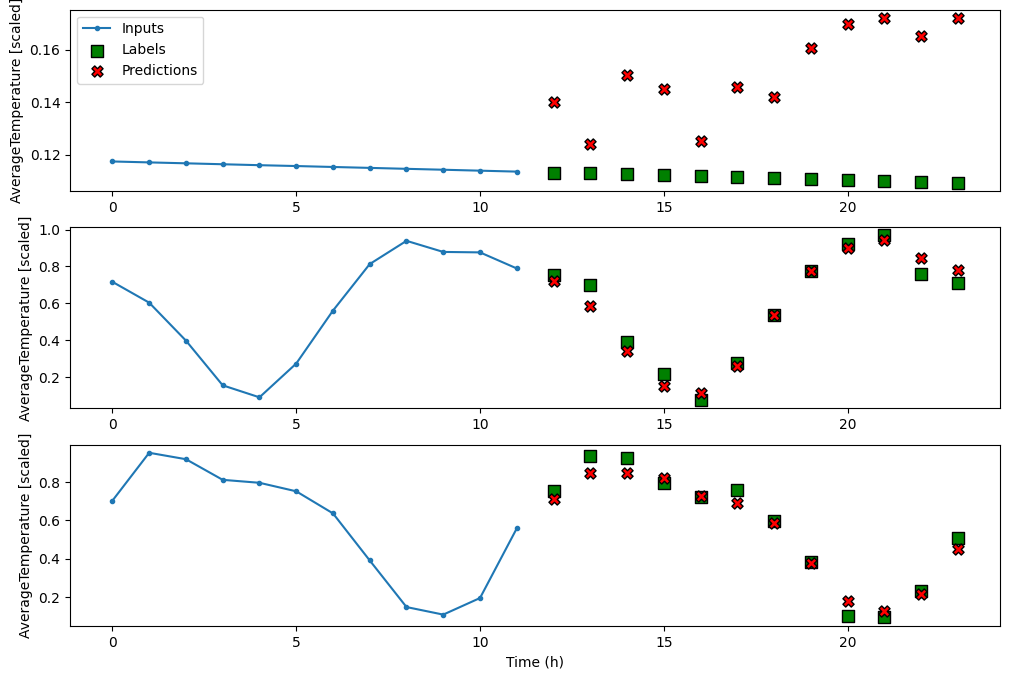

In [55]:
#multi_window.plot(ms_lstm_model)
multi_window.plot(ms_lstm_model)


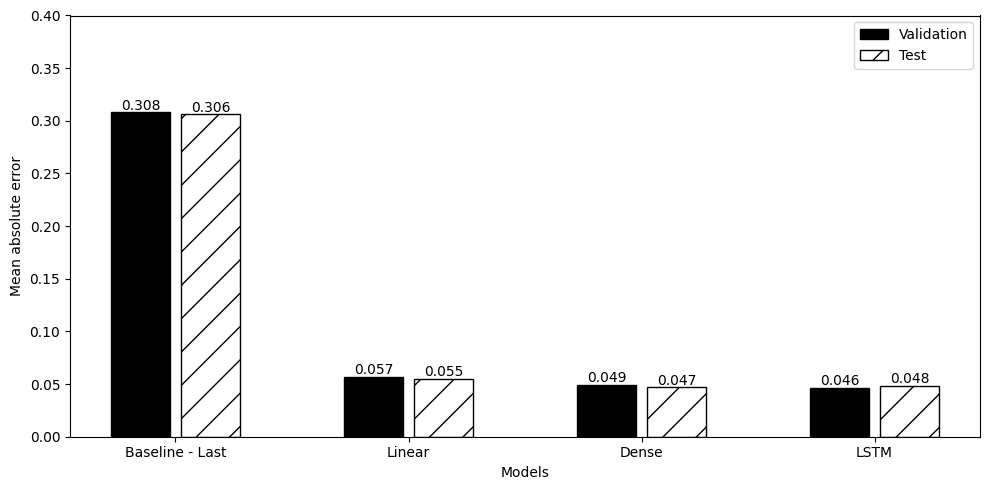

In [77]:
ms_mae_val = [0.308, 0.057, 0.049]
ms_mae_test = [0.306, 0.055, 0.047]

ms_mae_val.append(val_performance['LSTM'][1])
ms_mae_test.append(performance['LSTM'][1])



labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

### Multi-Step GRU Model

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1984 - mean_absolute_error: 0.3618 - val_loss: 0.0694 - val_mean_absolute_error: 0.2277
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0653 - mean_absolute_error: 0.2211 - val_loss: 0.0500 - val_mean_absolute_error: 0.1912
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0445 - mean_absolute_error: 0.1752 - val_loss: 0.0184 - val_mean_absolute_error: 0.1102
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0176 - mean_absolute_error: 0.1000 - val_loss: 0.0087 - val_mean_absolute_error: 0.0767
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0126 - mean_absolute_error: 0.0787 - val_loss: 0.0077 - val_mean_absolute_error: 0.0728
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0118 - mean_absolute_error: 0.0747 - val_loss: 0.0074 - val_mean_absolute_error: 0.0716
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0118 - mean_absolute_error: 0.0733 - val_loss

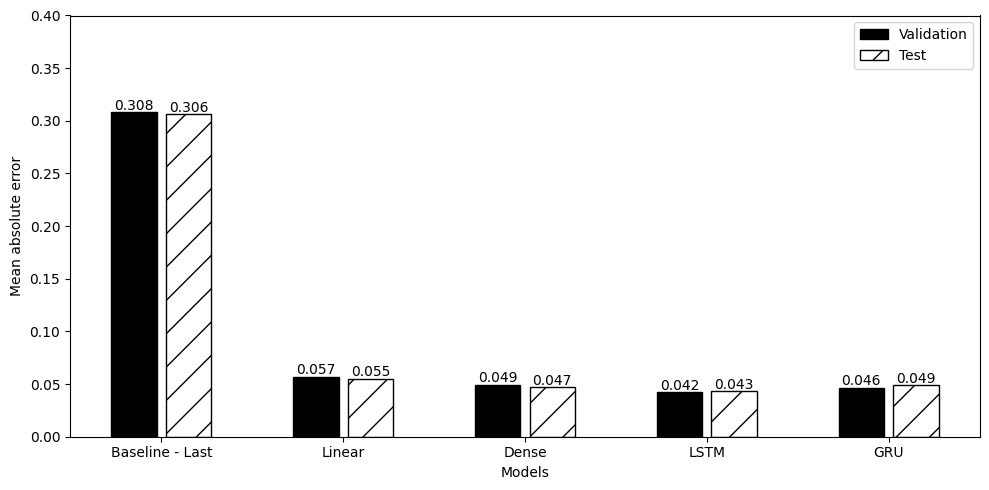

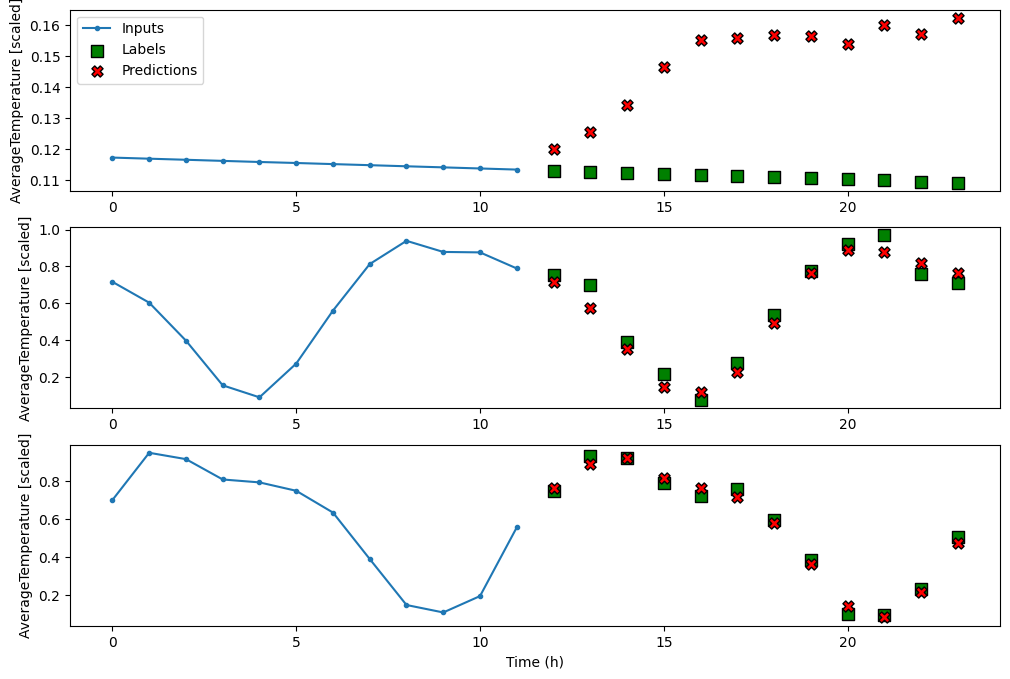

In [76]:
# multi step gru
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Reshape

# 1. Define the Multi-Step GRU model
ms_gru_model = Sequential([
    GRU(32, return_sequences=False),         # Output final hidden state only
    Dense(12),                               # Predict 24 time steps (assumes label_width=24)
    Reshape([12, 1])                         # Reshape to match (batch, time, features)
])

# 2. Compile and Fit using multi_window
history = compile_and_fit(ms_gru_model, multi_window)

# 3. Evaluate on validation and test sets
ms_val_performance['GRU'] = ms_gru_model.evaluate(multi_window.val)
ms_performance['GRU'] = ms_gru_model.evaluate(multi_window.test, verbose=0)

# 4. Existing MAE values (prior models)
ms_mae_val = [0.308, 0.057, 0.049, 0.042]    # Baseline, Linear, Dense, LSTM
ms_mae_test = [0.306, 0.055, 0.047, 0.043]

# 5. Append GRU MAE values
ms_mae_val.append(ms_val_performance['GRU'][1])
ms_mae_test.append(ms_performance['GRU'][1])

# 6. Plot all models including GRU
x = np.arange(5)
labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM', 'GRU']


fig, ax = plt.subplots(figsize=(10, 5))  # Wider horizontal plot
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

# Annotate MAE values
for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 7. Plot predictions using multi_window
multi_window.plot(ms_gru_model)


###Multi-Step RNN Model

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1390 - mean_absolute_error: 0.2942 - val_loss: 0.0261 - val_mean_absolute_error: 0.1289
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - mean_absolute_error: 0.1096 - val_loss: 0.0081 - val_mean_absolute_error: 0.0730
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0766 - val_loss: 0.0064 - val_mean_absolute_error: 0.0651
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0712 - val_loss: 0.0061 - val_mean_absolute_error: 0.0624
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0124 - mean_absolute_error: 0.0668 - val_loss: 0.0046 - val_mean_absolute_error: 0.0549
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0609 - val_loss: 0.0043 - val_mean_absolute_error: 0.0527
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0580 - val_loss: 0.00

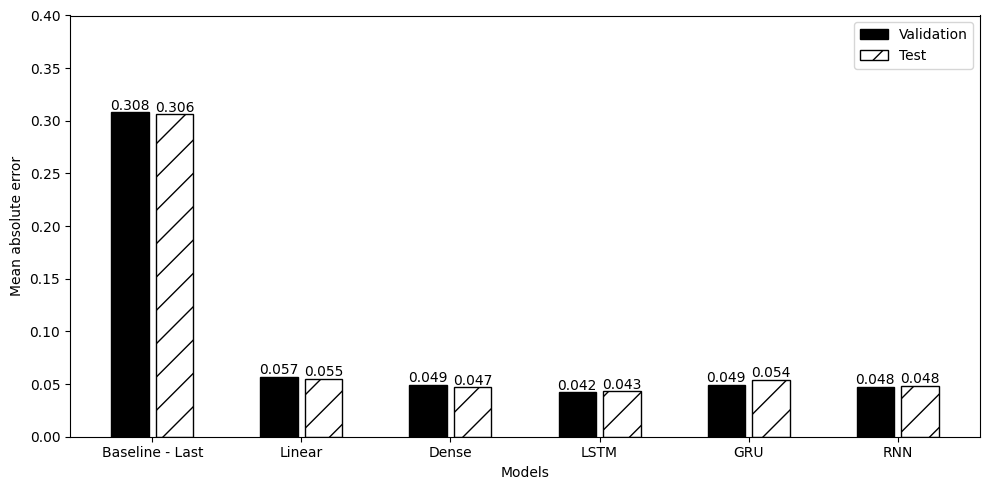

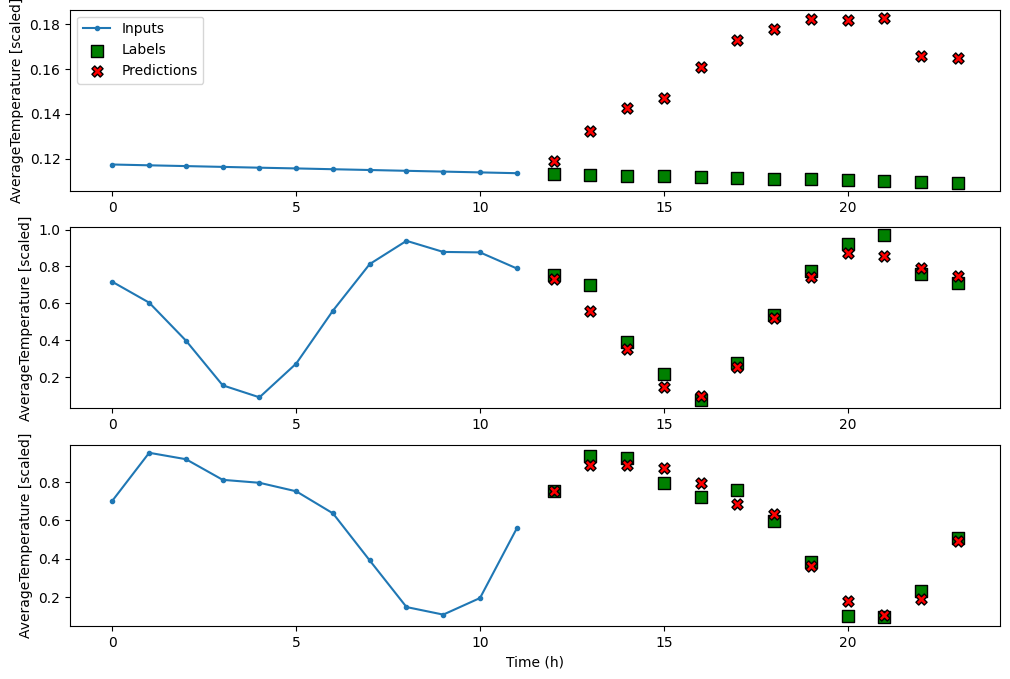

In [71]:
#multi step rnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Reshape

# 1. Define the Multi-Step RNN model
ms_rnn_model = Sequential([
    SimpleRNN(32, return_sequences=False),  # Only final output is needed
    Dense(12),                              # Predict 24 time steps
    Reshape([12, 1])                        # Reshape to (batch, time, features)
])

# 2. Compile and Fit using multi_window
history = compile_and_fit(ms_rnn_model, multi_window)

# 3. Evaluate on validation and test
ms_val_performance['RNN'] = ms_rnn_model.evaluate(multi_window.val)
ms_performance['RNN'] = ms_rnn_model.evaluate(multi_window.test, verbose=0)

# 4. Existing MAE values (Baseline, Linear, Dense, LSTM, GRU)
ms_mae_val = [0.308, 0.057, 0.049, 0.042, 0.049]
ms_mae_test = [0.306, 0.055, 0.047, 0.043, 0.054]

# 5. Append RNN results
ms_mae_val.append(ms_val_performance['RNN'][1])
ms_mae_test.append(ms_performance['RNN'][1])

# 6. Plot all models including RNN
x = np.arange(6)
labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM', 'GRU', 'RNN']

fig, ax = plt.subplots(figsize=(10, 5))  # Wider horizontal plot
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

# Add text annotations
for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 7. Plot predictions
multi_window.plot(ms_rnn_model)
